<h1>Multiple Linear Regression</h1>

<h2>Importing Packages</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df = pd.read_csv(url)

df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
517,2014,HYUNDAI,TUCSON,SUV - SMALL,2.0,4,A6,X,10.2,8.2,9.3,30,214
1025,2014,VOLKSWAGEN,BEETLE TDI CLEAN DIESEL,COMPACT,2.0,4,M6,D,8.5,5.8,7.3,39,197
368,2014,FORD,EXPLORER FFV AWD,SUV - STANDARD,3.5,6,AS6,E,18.9,13.9,16.7,17,267
627,2014,KIA,SOUL,STATION WAGON - SMALL,2.0,4,A6,X,10.1,7.8,9.1,31,209
222,2014,CHEVROLET,EXPRESS 1500 PASSENGER AWD,VAN - PASSENGER,5.3,8,A4,E,25.3,19.3,22.6,12,362


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
df = df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE',],axis=1)

In [8]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [10]:
df = df.drop(['CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis =1)

In [11]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


<h3>Scatterplot for each pair if input features</h3>

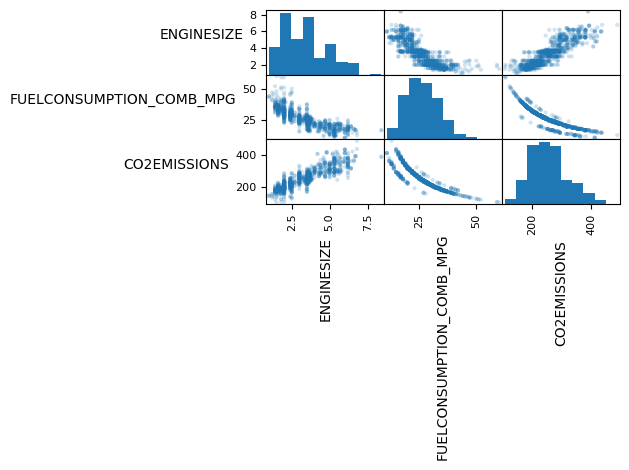

In [16]:
axes = pd.plotting.scatter_matrix(df,alpha =0.2)

for ax in axes.flatten():

    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0,hspace=0)
plt.show()

<h2>Extract input features and labels from dataset</h2>

In [17]:
X= df.iloc[:,[0,1]].to_numpy()
y= df.iloc[:,[2]].to_numpy()

<h3>Preprocess selected features</h3>

In [18]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [19]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


<h2>Creating train and test dataset</h2>

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state =42)

<h1>Building a Multiple Linear Regression Model</h1>

In [22]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train, y_train)

coef_ = regressor.coef_
intercept_ = regressor.intercept_

print('Coefficients:' , coef_)
print('Intercept:', intercept_)

Coefficients: [[ 25.27339614 -37.4381472 ]]
Intercept: [256.29072488]


<h3>Getting standard scaler mean and standard deviation parameters</h3>

In [23]:
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_)/std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


<h2>Visualize model outputs</h2>

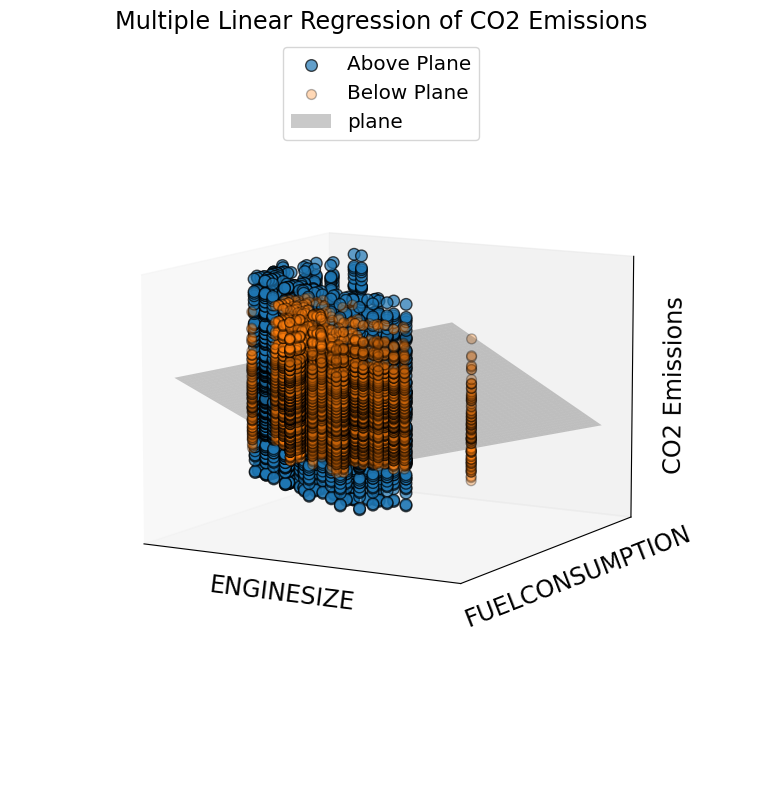

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()


<h2>Making vertical slices of 3D plot by plotting each variable seprately as best-fit using corresponding parameters</h2>

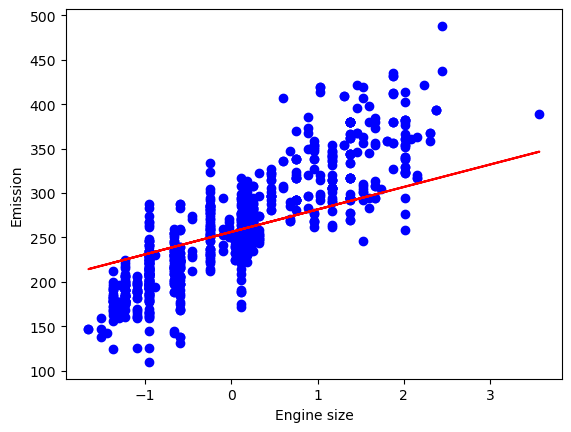

In [25]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

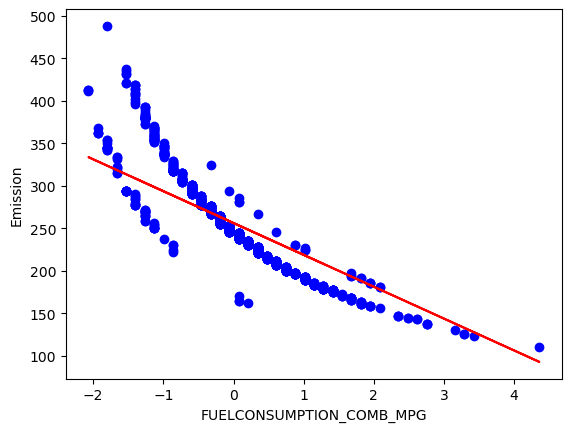

In [26]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

<h2>Determining parameters for best-fit Linear Regression for Co2 Emission v/s Engine Size</h2>

In [28]:
X_train_1 = X_train[:,0]

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1,1), y_train)
coef_1 = regressor_1.coef_  
intercept_1 = regressor_1.intercept_

print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


<h2>Plotting Scatterplot of Co2 Emission v/s Engine Size and including best-fit regression line to train data</h2>

Text(0, 0.5, 'Emission')

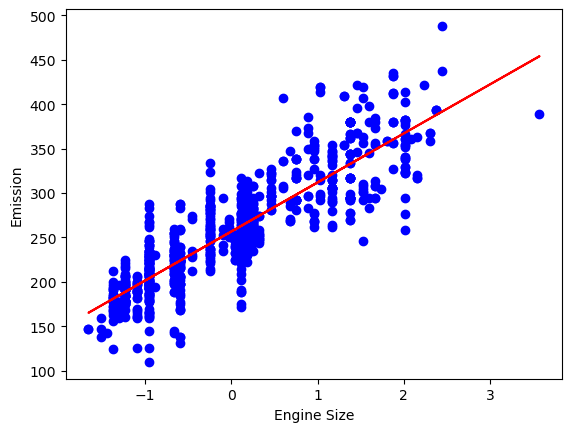

In [29]:
plt.scatter(X_train_1,y_train,color='blue')
plt.plot(X_train_1, coef_1[0]*X_train_1+ intercept_1,'-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')

<h2>Plotting same graph but now with base result on test data set</h2>

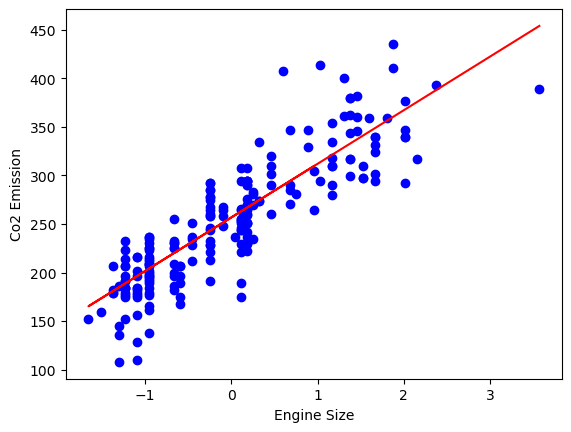

In [31]:
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test, color ='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.show()

<h2>Repeating same modeling but using FUELCONSUMPTION_COMB_MPG as independent variable</h2>

In [33]:
X_train_2 = X_train[:,1]
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1,1), y_train)
coef_2 = regressor.coef_
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.09392179]


<h2>Generating Scatter plot showing result as before on test data</h2>

ValueError: operands could not be broadcast together with shapes (2,) (214,) 

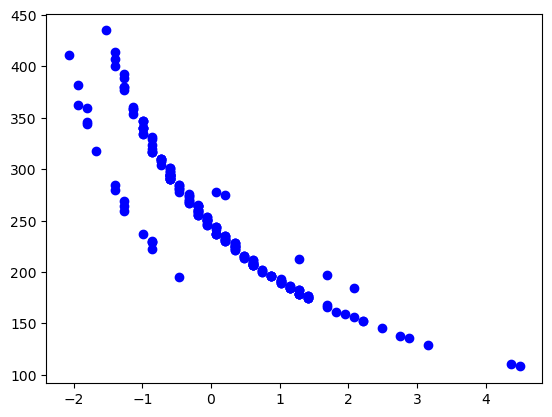

In [39]:
X_test_2 = X_test[:,1]
plt.scatter(X_test_2, y_test,  color='blue')
plt.plot(X_test_2, coef_2[0] * X_test_2 + intercept_2, '-r')
plt.xlabel("combined Fuel Consumption (MPG)")
plt.ylabel("CO2 Emission")